In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()
Pkg.status()

  Activating project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation`


Status `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Project.toml`
  [8bb1440f] DelimitedFiles v1.9.1
  [0bd82848] FEMTISE v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] Gridap v0.17.23
  [033835bb] JLD2 v0.4.46
  [f0f68f2c] PlotlyJS v0.18.13
⌅ [91a5bcdd] Plots v1.39.0
  [295af30f] Revise v3.5.14
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [2]:
develop_package = false
computer = "pcfamaf"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

develop_package ? Pkg.develop(path="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl") : nothing

In [3]:
install_pkg = false
if install_pkg
    Pkg.add("Revise")
    Pkg.add("Gridap")
    Pkg.add("Plots")
    Pkg.add("JLD2")
    Pkg.add("DelimitedFiles")
    Pkg.add("PlotlyJS")
end
using Revise;
using FEMTISE;
using Gridap;
using Gridap.CellData;
using Plots;
using JLD2;
using DelimitedFiles;

In [4]:
include("./post_proccesing_result_data.jl")
include("./adhoc_potential_function.jl")

effective_electronic_potential_2D (generic function with 1 method)

In [5]:
path_repository="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE_TUTORIAL/"
path_input_file="$(path_repository)030_experimentation/030_test/coulomb_potential_2D_parameter_variation/020_input/"
input_file_name="$(path_input_file)input"

"/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/020_input/input"

In [13]:
simulation_info, output_data = collect_result_data(true,input_file_name)

(InputData2D{Tuple{String, String}, Params2D, FEMTISE.AnalysisParam{Float64}, Tuple{Bool, Nothing}}("/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/040_output/", "/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/050_analysis/adhoc_potential_function", Params2D("2D", 50.0, 50.0, "s", 100, 100, 10, 0.0, "effective_electronic_potential_2D", (1.0, 0.5)), FEMTISE.AnalysisParam{Float64}(1, 0.0, 1.0, 0.5), (false, nothing), false, ("jld2", "eigen")), AnalysisParam(ComplexF64[1.81911978787344 - 5.470796052443066e-17im 2.4386404584262373 + 7.755533926028015e-17im; 2.3805185446034884 + 5.528446450987807e-17im 2.7295144916301157 - 3.56613859501182e-17im; … ; 4.499333706991823 + 4.315219339904327e-17im 5.032808488838194 + 1.4466785871104031e-16im; 4.8240988903609905 + 6.736187378775414e-17im 5.445062292156025 - 1.54225843181

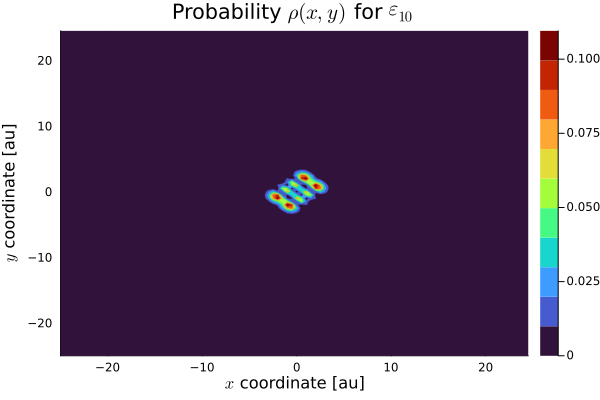

In [11]:
fig1=plot_eigenstates(simulation_info,output_data,10;mapcolor=:turbo)
display(fig1)

In [12]:
save("eigenstate_energy10.pdf",fig1)

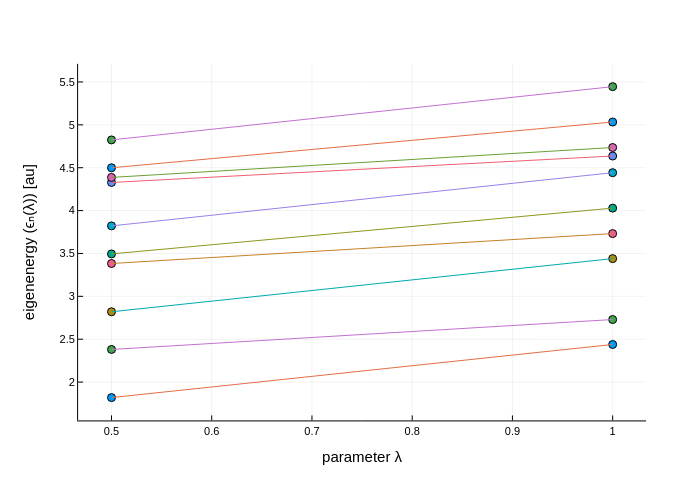

In [20]:
fig1=plot_eigenvalues(simulation_info,output_data,1:1:10;show_label=false)
display(fig1)